## 1- Prerequisite and setting up the environment.

Data Folder:
Data/tweet.txt
Data/tweet_x.csv

Libraries:
sklearn
scipy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from Definations import *
from Utilities import *
from sklearn.feature_selection.univariate_selection import SelectPercentile
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import isomap
import numpy as np
from scipy.sparse import hstack

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# First Stage

## Dataset Exploration

##  Benchmark Experiment Replication using ASTD

1. It stands for Arabic Sentemental Tweet Dataset which is used for arabic social sentimental analysis .
2. Consist of 10000 tweets gathered from twitter.
3. Each tweet is Classified as: objective, subjective positive, subjective negative or subjective mixed.

#### Loading the data set in jupyter for exploration.

### Text File

In [4]:
import codecs
filename = codecs.open('data\Tweets.txt', 'r', encoding="utf-8")
outputfile = filename.readlines()
for line in outputfile[0:5]:
    print(line)

بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان	OBJ

أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته	POS

البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف	NEG

#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة	OBJ

الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان	NEUTRAL



### CSV File

In [5]:
df = pd.read_csv('data\Tweets_x.csv', delimiter='\t',names= ["Tweet", "Classification"])

df.head()

,Tweet,Classification
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL


In [6]:
df.describe()

,Tweet,Classification
count,10006,9986
unique,10002,4
top,يوسف الحسيني بالفيديو يفضح كذب قناة الجزيرة وي...,OBJ
freq,2,6675


AS it can be clearly seen, I lost some data in this process since i converted the txt into csv using excel. I removed them to keep dataset consistant but I will fix this issue later

## Show Count of All Categories

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Tweet,Classification
count,9986,9986
unique,9982,4
top,الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...,OBJ
freq,2,6675


OBJ        6675
NEG        1682
NEUTRAL     831
POS         798
Name: Classification, dtype: int64


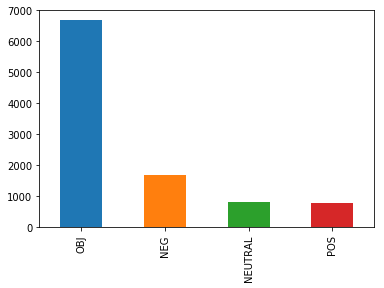

In [9]:
s2 = df.Classification
print(s2.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.value_counts().plot( kind="bar") 
plt.show()

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# y = np.random.rand(10,4)
# y[:,0]= np.arange(10)
# df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

# ax = df.plot(x="X", y="A", kind="bar")
# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

## Benchmark Model

Experments conducted is about applying wide range of standard classifiers on balanced and unbalanced data using token count with/without Tf-Idf to preprocess the dataset.

These Classifiers are:
    - Logistic Regression
    - Passive Aggresive
    - SVM
    - Perceptron
    - bnb
    - mnb
    - sgd
    - KNN

### ASTD paper Experiment Replication

#### String Token Count:

It takes each sentence (all the words) present in the data set in the review section and then splits each of the words present in the form of tokens. The occurrence of these tokens in the whole data set are counted in such a way that the count of the occurrence of each token in a positive and negative feedback (in balanced dataset) or positive, negative and neutral (in unbalanced dataset) are collected separately. Finally, the word frequency of the tokens is calculated.
Tokens count is calculated by LinkedHashMap method. 


Tools: LinkedHashMap is it contains only the unique elements implemented using JAVA or OrderedDict in Python

code:  https://stackoverflow.com/questions/653887/equivalent-for-linkedhashmap-in-python

Ref: https://acadpubl.eu/hub/2018-119-12/articles/5/1211.pdf

#### Frequency–inverse document frequency(Tfidf):


It measures how important a word is to differentiate each category. It reduce the weightage of more common words like (stop words or common words) which occurs in all tweets. 

Code: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd 

Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf 

In [11]:
#this function to retrive sentimental count in each class
def GetCount(array):
    df = pd.DataFrame(array,columns= ["Class"])
    counts = df.Class.value_counts()
    OBJ = counts['OBJ']
    NEG = counts['NEG']
    NEUTRAL = counts['NEUTRAL']
    POS = counts['POS']
    return [OBJ, NEG, NEUTRAL ,POS]

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}

results = []

FeatuerDataSet = []
for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])
    

#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_train) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_test) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_valid) 
    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set']
    df_tweetCount['name'] = data['name']
    TweetCount_collection[data['name']] = df_tweetCount
    #---------------------------------------------------------------------------------
    ####################################################################################
    
    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
#         print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################
        
        
        FeatuerData = [data['name'], feat_generator['name'],X_train.shape[1]]
        FeatuerDataSet.append(FeatuerData)
        for clf in classifiers:
                    if clf['parameter_tunning']:
                        print(" tuning:", clf['name'],data['name'])
                        print("\n" +"-"*40)

                        # region parameter tunning
                        
                        clf['tune_clf'].fit(X_train, y_train)
                        best_predictions = clf['tune_clf'].predict(X_test)
        
                        predictions = (clf["clf"].fit(X_train, y_train)).predict(X_test)
                        
                
                        # Report the before-and-afterscores
                        Clf_name = clf["name"] 

                        UnOpt_accuracy = accuracy_score(y_test, predictions)
                        UnOpt_fScore = f1_score(y_test, predictions,average='macro')
                        Opt_accuracy = accuracy_score(y_test, best_predictions)
                        Opt_fScore = f1_score(y_test, best_predictions,average='macro')
                        Best_Settings = clf["tune_clf"].best_params_
                        Settings = clf["clf"].get_params()
                        datarow = [Clf_name,data['name'],feat_generator['name'], Best_Settings,Settings,UnOpt_accuracy , UnOpt_fScore , Opt_accuracy , Opt_fScore]

                        results.append(datarow)
                        
                        (acc, tacc, support, f1 , df) = Evaluate_Result(predictions, y_test)

                        score = dict(data=data['name'],
                                         feat_generator=feat_generator['name'],
                                         clf=clf['name'],
                                         # feat_ext=feat_ext['name'],
                                         f1=f1,
                                         acc=acc,
                                         tacc=tacc)

                        df['Classifier'] =  clf["name"]
                        df['feauter_generator'] = feat_generator['name']

                        df['acc'] = acc
                        df['f1']=f1

                        dataframe_collection[ data['name'] + '-' + clf["name"] + '-' + feat_generator['name'] ]  = df
#                         print(clf["name"],df['feauter_generator'] )
                        scores.append(score)
    
    for key in dataframe_collection.keys():
        print("\n" +"="*40)
        print(key)
        print("-"*40)
        print(dataframe_collection[key])

        df_Classifiers = pd.DataFrame(classifiers)
        classifiers_collection[data['name']] = df_Classifiers

    #     print("-"*40)
    #     print(df_Classifiers.head())

        df_s = pd.DataFrame(scores)
        scores_collection[data['name']] = df_s
    
                        
df_feauterCount = pd.DataFrame(FeatuerDataSet, columns=['DataSet_Name','Feauter_Generator','Feauters_Count'])
    
# ####################################Testing##############################################


('Loading data:', '4-balanced')

(' tuning:', 'Logistic Regression', '4-balanced')

----------------------------------------
(' tuning:', 'Passive Aggresive', '4-balanced')

----------------------------------------


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(' tuning:', 'SVM', '4-balanced')

----------------------------------------
(' tuning:', 'Perceptron', '4-balanced')

----------------------------------------


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(' tuning:', 'bnb', '4-balanced')

----------------------------------------
(' tuning:', 'sgd', '4-balanced')

----------------------------------------


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(' tuning:', 'KNN', '4-balanced')

----------------------------------------
(' tuning:', 'RandomForest', '4-balanced')

----------------------------------------
(' tuning:', 'DecisionTree', '4-balanced')

----------------------------------------
(' tuning:', 'mnb', '4-balanced')

----------------------------------------


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


(' tuning:', 'Logistic Regression', '4-balanced')

----------------------------------------
(' tuning:', 'Passive Aggresive', '4-balanced')

----------------------------------------
(' tuning:', 'SVM', '4-balanced')

----------------------------------------
(' tuning:', 'Perceptron', '4-balanced')

----------------------------------------
(' tuning:', 'bnb', '4-balanced')

----------------------------------------
(' tuning:', 'sgd', '4-balanced')

----------------------------------------
(' tuning:', 'KNN', '4-balanced')

----------------------------------------
(' tuning:', 'RandomForest', '4-balanced')

----------------------------------------
(' tuning:', 'DecisionTree', '4-balanced')

----------------------------------------
(' tuning:', 'mnb', '4-balanced')

----------------------------------------
(' tuning:', 'Logistic Regression', '4-balanced')

----------------------------------------
(' tuning:', 'Passive Aggresive', '4-balanced')

----------------------------------------
(' 

     TP     FP     FN        L  Percision    Recall           Classifier  \
0  58.0   78.0  101.0      NEG   0.426471  0.364780  Logistic Regression   
1  71.0  110.0   88.0  NEUTRAL   0.392265  0.446541  Logistic Regression   
2  85.0   98.0   74.0      OBJ   0.464481  0.534591  Logistic Regression   
3  73.0   63.0   86.0      POS   0.536765  0.459119  Logistic Regression   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.451258  0.450715  
1         tfidf_ng2  0.451258  0.450715  
2         tfidf_ng2  0.451258  0.450715  
3         tfidf_ng2  0.451258  0.450715  

4-balanced-Logistic Regression-tfidf_ng1
----------------------------------------
     TP    FP    FN        L  Percision    Recall           Classifier  \
0  65.0  92.0  94.0      NEG   0.414013  0.408805  Logistic Regression   
1  64.0  97.0  95.0  NEUTRAL   0.397516  0.402516  Logistic Regression   
2  85.0  92.0  74.0      OBJ   0.480226  0.534591  Logistic Regression   
3  74.0  67.0  85.0      POS  

     TP     FP    FN        L  Percision    Recall         Classifier  \
0  60.0   82.0  99.0      NEG   0.422535  0.377358  Passive Aggresive   
1  71.0  112.0  88.0  NEUTRAL   0.387978  0.446541  Passive Aggresive   
2  85.0   91.0  74.0      OBJ   0.482955  0.534591  Passive Aggresive   
3  70.0   65.0  89.0      POS   0.518519  0.440252  Passive Aggresive   

  feauter_generator       acc        f1  
0         tfidf_ng3  0.449686  0.449382  
1         tfidf_ng3  0.449686  0.449382  
2         tfidf_ng3  0.449686  0.449382  
3         tfidf_ng3  0.449686  0.449382  

4-balanced-DecisionTree-tfidf_ng1
----------------------------------------
     TP     FP     FN        L  Percision    Recall    Classifier  \
0  44.0  110.0  115.0      NEG   0.285714  0.276730  DecisionTree   
1  53.0   85.0  106.0  NEUTRAL   0.384058  0.333333  DecisionTree   
2  58.0  110.0  101.0      OBJ   0.345238  0.364780  DecisionTree   
3  63.0  113.0   96.0      POS   0.357955  0.396226  DecisionTree   

  

      TP     FP     FN        L  Percision    Recall Classifier  \
0   36.0   23.0  123.0      NEG   0.610169  0.226415        bnb   
1    6.0    5.0  153.0  NEUTRAL   0.545455  0.037736        bnb   
2   70.0   69.0   89.0      OBJ   0.503597  0.440252        bnb   
3  139.0  288.0   20.0      POS   0.325527  0.874214        bnb   

  feauter_generator       acc        f1  
0         count_ng3  0.394654  0.336266  
1         count_ng3  0.394654  0.336266  
2         count_ng3  0.394654  0.336266  
3         count_ng3  0.394654  0.336266  

4-balanced-KNN-count_ng2
----------------------------------------
     TP     FP     FN        L  Percision    Recall Classifier  \
0  76.0  212.0   83.0      NEG   0.263889  0.477987        KNN   
1   5.0   12.0  154.0  NEUTRAL   0.294118  0.031447        KNN   
2  53.0  102.0  106.0      OBJ   0.341935  0.333333        KNN   
3  44.0  132.0  115.0      POS   0.250000  0.276730        KNN   

  feauter_generator       acc        f1  
0         coun

(' tuning:', 'Logistic Regression', '4-unbalanced')

----------------------------------------
(' tuning:', 'Passive Aggresive', '4-unbalanced')

----------------------------------------
(' tuning:', 'SVM', '4-unbalanced')

----------------------------------------
(' tuning:', 'Perceptron', '4-unbalanced')

----------------------------------------
(' tuning:', 'bnb', '4-unbalanced')

----------------------------------------


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(' tuning:', 'sgd', '4-unbalanced')

----------------------------------------
(' tuning:', 'KNN', '4-unbalanced')

----------------------------------------
(' tuning:', 'RandomForest', '4-unbalanced')

----------------------------------------
(' tuning:', 'DecisionTree', '4-unbalanced')

----------------------------------------
(' tuning:', 'mnb', '4-unbalanced')

----------------------------------------
(' tuning:', 'Logistic Regression', '4-unbalanced')

----------------------------------------
(' tuning:', 'Passive Aggresive', '4-unbalanced')

----------------------------------------
(' tuning:', 'SVM', '4-unbalanced')

----------------------------------------
(' tuning:', 'Perceptron', '4-unbalanced')

----------------------------------------
(' tuning:', 'bnb', '4-unbalanced')

----------------------------------------
(' tuning:', 'sgd', '4-unbalanced')

----------------------------------------
(' tuning:', 'KNN', '4-unbalanced')

----------------------------------------
(' tuning

       TP     FP     FN        L  Percision    Recall Classifier  \
0    18.0   51.0  318.0      NEG   0.260870  0.053571        KNN   
1     3.0   10.0  163.0  NEUTRAL   0.230769  0.018072        KNN   
2  1287.0  621.0   51.0      OBJ   0.674528  0.961883        KNN   
3     2.0    7.0  157.0      POS   0.222222  0.012579        KNN   

  feauter_generator       acc        f1  
0         count_ng2  0.655328  0.550384  
1         count_ng2  0.655328  0.550384  
2         count_ng2  0.655328  0.550384  
3         count_ng2  0.655328  0.550384  

4-balanced-Passive Aggresive-tfidf_ng1
----------------------------------------
     TP     FP     FN        L  Percision    Recall         Classifier  \
0  71.0   90.0   88.0      NEG   0.440994  0.446541  Passive Aggresive   
1  57.0   90.0  102.0  NEUTRAL   0.387755  0.358491  Passive Aggresive   
2  86.0  102.0   73.0      OBJ   0.457447  0.540881  Passive Aggresive   
3  70.0   70.0   89.0      POS   0.500000  0.440252  Passive Aggresive  

3         tfidf_ng3  0.484277  0.485361  

4-balanced-mnb-tfidf_ng2
----------------------------------------
     TP     FP    FN        L  Percision    Recall Classifier  \
0  60.0   69.0  99.0      NEG   0.465116  0.377358        mnb   
1  83.0  130.0  76.0  NEUTRAL   0.389671  0.522013        mnb   
2  90.0   72.0  69.0      OBJ   0.555556  0.566038        mnb   
3  79.0   53.0  80.0      POS   0.598485  0.496855        mnb   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.490566  0.491652  
1         tfidf_ng2  0.490566  0.491652  
2         tfidf_ng2  0.490566  0.491652  
3         tfidf_ng2  0.490566  0.491652  

4-balanced-mnb-tfidf_ng1
----------------------------------------
     TP     FP    FN        L  Percision    Recall Classifier  \
0  67.0   80.0  92.0      NEG   0.455782  0.421384        mnb   
1  79.0  128.0  80.0  NEUTRAL   0.381643  0.496855        mnb   
2  86.0   68.0  73.0      OBJ   0.558442  0.540881        mnb   
3  75.0   53.0  84.0      PO


4-balanced-sgd-count_ng3
----------------------------------------
     TP     FP    FN        L  Percision    Recall Classifier  \
0  65.0   86.0  94.0      NEG   0.430464  0.408805        sgd   
1  64.0  108.0  95.0  NEUTRAL   0.372093  0.402516        sgd   
2  73.0   75.0  86.0      OBJ   0.493243  0.459119        sgd   
3  85.0   80.0  74.0      POS   0.515152  0.534591        sgd   

  feauter_generator       acc        f1  
0         count_ng3  0.451258  0.451581  
1         count_ng3  0.451258  0.451581  
2         count_ng3  0.451258  0.451581  
3         count_ng3  0.451258  0.451581  

4-balanced-RandomForest-count_ng1
----------------------------------------
     TP     FP     FN        L  Percision    Recall    Classifier  \
0  55.0   97.0  104.0      NEG   0.361842  0.345912  RandomForest   
1  49.0   79.0  110.0  NEUTRAL   0.382812  0.308176  RandomForest   
2  74.0   99.0   85.0      OBJ   0.427746  0.465409  RandomForest   
3  68.0  115.0   91.0      POS   0.371585  0.

       TP     FP     FN        L  Percision    Recall         Classifier  \
0   121.0  155.0  215.0      NEG   0.438406  0.360119  Passive Aggresive   
1    16.0   65.0  150.0  NEUTRAL   0.197531  0.096386  Passive Aggresive   
2  1180.0  401.0  158.0      OBJ   0.746363  0.881913  Passive Aggresive   
3    30.0   31.0  129.0      POS   0.491803  0.188679  Passive Aggresive   

  feauter_generator       acc       f1  
0         tfidf_ng2  0.673837  0.64007  
1         tfidf_ng2  0.673837  0.64007  
2         tfidf_ng2  0.673837  0.64007  
3         tfidf_ng2  0.673837  0.64007  

4-unbalanced-Passive Aggresive-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall         Classifier  \
0   107.0  184.0  229.0      NEG   0.367698  0.318452  Passive Aggresive   
1    16.0   83.0  150.0  NEUTRAL   0.161616  0.096386  Passive Aggresive   
2  1128.0  403.0  210.0      OBJ   0.736773  0.843049  Passive Aggresive   
3    31.0   47.0  128.0    

     TP     FP     FN        L  Percision    Recall Classifier  \
0  62.0  101.0   97.0      NEG   0.380368  0.389937        KNN   
1  59.0  119.0  100.0  NEUTRAL   0.331461  0.371069        KNN   
2  80.0   88.0   79.0      OBJ   0.476190  0.503145        KNN   
3  58.0   69.0  101.0      POS   0.456693  0.364780        KNN   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.407233  0.407533  
1         tfidf_ng2  0.407233  0.407533  
2         tfidf_ng2  0.407233  0.407533  
3         tfidf_ng2  0.407233  0.407533  

4-unbalanced-KNN-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0    84.0  103.0  252.0      NEG   0.449198  0.250000        KNN   
1     7.0   43.0  159.0  NEUTRAL   0.140000  0.042169        KNN   
2  1229.0  495.0  109.0      OBJ   0.712877  0.918535        KNN   
3    13.0   25.0  146.0      POS   0.342105  0.081761        KNN   

  feauter_generator       acc        f1  
0      

     TP     FP     FN        L  Percision    Recall Classifier  \
0  65.0   89.0   94.0      NEG   0.422078  0.408805        SVM   
1  47.0   77.0  112.0  NEUTRAL   0.379032  0.295597        SVM   
2  79.0   94.0   80.0      OBJ   0.456647  0.496855        SVM   
3  82.0  103.0   77.0      POS   0.443243  0.515723        SVM   

  feauter_generator       acc        f1  
0         count_ng1  0.429245  0.425035  
1         count_ng1  0.429245  0.425035  
2         count_ng1  0.429245  0.425035  
3         count_ng1  0.429245  0.425035  

4-balanced-Perceptron-count_ng3
----------------------------------------
     TP     FP     FN        L  Percision    Recall  Classifier  \
0  53.0   73.0  106.0      NEG   0.420635  0.333333  Perceptron   
1  65.0  115.0   94.0  NEUTRAL   0.361111  0.408805  Perceptron   
2  60.0   56.0   99.0      OBJ   0.517241  0.377358  Perceptron   
3  95.0  119.0   64.0      POS   0.443925  0.597484  Perceptron   

  feauter_generator       acc        f1  
0      

     TP     FP    FN        L  Percision    Recall Classifier  \
0  67.0   84.0  92.0      NEG   0.443709  0.421384        SVM   
1  64.0  105.0  95.0  NEUTRAL   0.378698  0.402516        SVM   
2  86.0   88.0  73.0      OBJ   0.494253  0.540881        SVM   
3  75.0   67.0  84.0      POS   0.528169  0.471698        SVM   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.459119  0.459339  
1         tfidf_ng1  0.459119  0.459339  
2         tfidf_ng1  0.459119  0.459339  
3         tfidf_ng1  0.459119  0.459339  

4-unbalanced-Logistic Regression-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall           Classifier  \
0    85.0  100.0  251.0      NEG   0.459459  0.252976  Logistic Regression   
1     8.0   42.0  158.0  NEUTRAL   0.160000  0.048193  Logistic Regression   
2  1252.0  480.0   86.0      OBJ   0.722864  0.935725  Logistic Regression   
3    16.0   16.0  143.0      POS   0.500000  0.100629  Logistic Reg

### Data Preperation Statistics

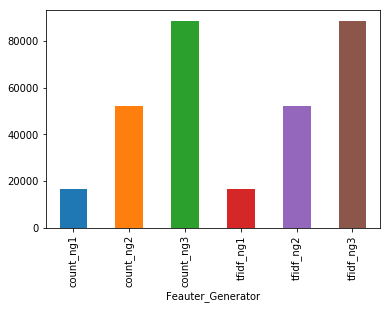

In [15]:
balanceFeauters = df_feauterCount[df_feauterCount['DataSet_Name'] == '4-balanced']
balanceFeauters.index = balanceFeauters.Feauter_Generator

balanceFeauters['Feauters_Count'].plot(kind='bar')
plt.show()

In [16]:
balanceFeauters

,DataSet_Name,Feauter_Generator,Feauters_Count
Feauter_Generator,,,
count_ng1,4-balanced,count_ng1,16457
count_ng2,4-balanced,count_ng2,52036
count_ng3,4-balanced,count_ng3,88672
tfidf_ng1,4-balanced,tfidf_ng1,16457
tfidf_ng2,4-balanced,tfidf_ng2,52036
tfidf_ng3,4-balanced,tfidf_ng3,88672


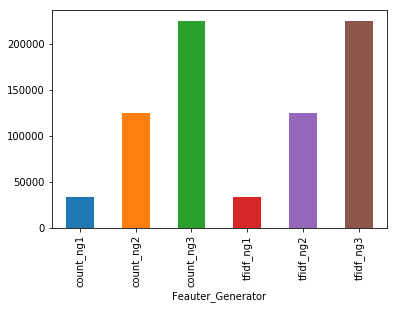

In [17]:
unbalanceFeauters = df_feauterCount[df_feauterCount['DataSet_Name'] == '4-unbalanced']
unbalanceFeauters.index = unbalanceFeauters.Feauter_Generator

unbalanceFeauters['Feauters_Count'].plot(kind='bar')
plt.show()

In [18]:
unbalanceFeauters

,DataSet_Name,Feauter_Generator,Feauters_Count
Feauter_Generator,,,
count_ng1,4-unbalanced,count_ng1,33365
count_ng2,4-unbalanced,count_ng2,124760
count_ng3,4-unbalanced,count_ng3,225111
tfidf_ng1,4-unbalanced,tfidf_ng1,33365
tfidf_ng2,4-unbalanced,tfidf_ng2,124760
tfidf_ng3,4-unbalanced,tfidf_ng3,225111


In [19]:
# df_feauterCount[df_feauterCount['Feauter_Generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
df_feauterCount[df_feauterCount['DataSet_Name'] == '4-unbalanced']

,DataSet_Name,Feauter_Generator,Feauters_Count
6,4-unbalanced,count_ng1,33365
7,4-unbalanced,count_ng2,124760
8,4-unbalanced,count_ng3,225111
9,4-unbalanced,tfidf_ng1,33365
10,4-unbalanced,tfidf_ng2,124760
11,4-unbalanced,tfidf_ng3,225111


In [20]:
TweetCount_collection['4-balanced']

,OBJ,NEG,NEUTRAL,POS,Dataset,name
0,640,640,640,640,Train Set,4-balanced
1,159,159,159,159,Test Set,4-balanced


In [21]:
TweetCount_collection['4-unbalanced']

,OBJ,NEG,NEUTRAL,POS,Dataset,name
0,5353,1348,666,640,Train Set,4-unbalanced
1,1338,336,166,159,Test Set,4-unbalanced


## Benchmark model experiments settings

In [22]:
df_resutlts = pd.DataFrame(results,columns=['clasifiers','Data','Feauter_Generator' ,'Best_Settings','Settings' , 'UnOpt_accuracys' , 'UnOpt_fScores' , 'Opt_accuracys' , 'Opt_fScores'])
# df_resutlts.index = df_resutlts.clasifiers.get_values()
df_resutlts.head()

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
0,Logistic Regression,4-balanced,count_ng1,{u'C': 1.0},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.452830,0.448856,0.452830,0.448856
1,Passive Aggresive,4-balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...","{u'warm_start': False, u'loss': u'hinge', u'C'...",0.430818,0.427069,0.437107,0.432830
2,SVM,4-balanced,count_ng1,"{u'loss': u'hinge', u'C': 0.1, u'intercept_sca...","{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.429245,0.425035,0.449686,0.446250
3,Perceptron,4-balanced,count_ng1,"{u'warm_start': True, u'eta0': 0.5, u'shuffle'...","{u'warm_start': False, u'n_iter': None, u'n_jo...",0.429245,0.428450,0.408805,0.408631
4,bnb,4-balanced,count_ng1,"{u'binarize': 0.0, u'alpha': 0.2, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.466981,0.447112,0.468553,0.462307


In [23]:
df_resutlts[df_resutlts['Opt_accuracys'] > .69]

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
70,Logistic Regression,4-unbalanced,count_ng2,{u'C': 1.0},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.693347,0.333914,0.693347,0.333914
75,sgd,4-unbalanced,count_ng2,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.676838,0.375684,0.691846,0.357411
80,Logistic Regression,4-unbalanced,count_ng3,{u'C': 2.7825594},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.691846,0.324267,0.691846,0.327991
105,sgd,4-unbalanced,tfidf_ng2,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.691346,0.365591,0.691846,0.362187
115,sgd,4-unbalanced,tfidf_ng3,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.687844,0.364768,0.690345,0.361492


## Standard Classifiers Performance

[Text(0,0,'Logistic Regression'),
 Text(0,0,'Passive Aggresive'),
 Text(0,0,'SVM'),
 Text(0,0,'Perceptron'),
 Text(0,0,'bnb'),
 Text(0,0,'sgd'),
 Text(0,0,'KNN'),
 Text(0,0,'RandomForest'),
 Text(0,0,'DecisionTree')]

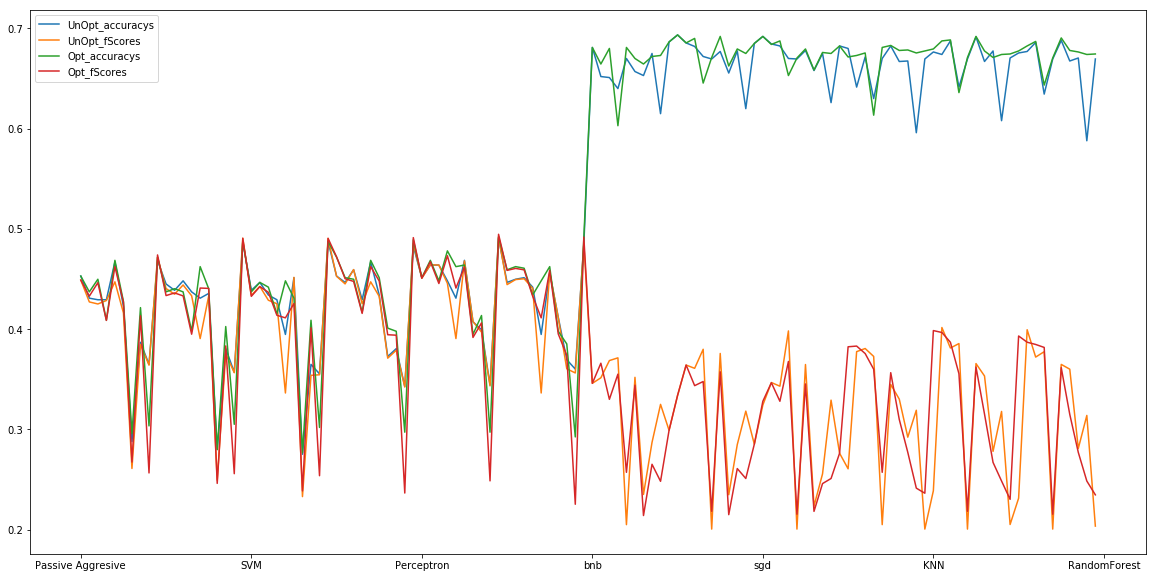

In [38]:
ax = df_resutlts.plot(figsize=(20,10))
ax.set_xticklabels( df_resutlts.clasifiers.get_values())
# ax.set_xticks([1,2,3,4,5,6,7,8,9])

It can be clearly seen how the performance increase after using the unbalanced data. The one with higherst performance is BNB.

### String Token Count Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [27]:
balanced_scores = df_resutlts[df_resutlts['Data'] == '4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['Feauter_Generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
0,Logistic Regression,4-balanced,count_ng1,{u'C': 1.0},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.452830,0.448856,0.452830,0.448856
1,Passive Aggresive,4-balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...","{u'warm_start': False, u'loss': u'hinge', u'C'...",0.430818,0.427069,0.437107,0.432830
2,SVM,4-balanced,count_ng1,"{u'loss': u'hinge', u'C': 0.1, u'intercept_sca...","{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.429245,0.425035,0.449686,0.446250
3,Perceptron,4-balanced,count_ng1,"{u'warm_start': True, u'eta0': 0.5, u'shuffle'...","{u'warm_start': False, u'n_iter': None, u'n_jo...",0.429245,0.428450,0.408805,0.408631
4,bnb,4-balanced,count_ng1,"{u'binarize': 0.0, u'alpha': 0.2, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.466981,0.447112,0.468553,0.462307
5,sgd,4-balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.422956,0.416146,0.427673,0.426888
6,KNN,4-balanced,count_ng1,"{u'n_neighbors': 8, u'n_jobs': 1, u'algorithm'...","{u'n_neighbors': 5, u'n_jobs': 1, u'algorithm'...",0.287736,0.260986,0.295597,0.267405
7,RandomForest,4-balanced,count_ng1,"{u'warm_start': False, u'oob_score': False, u'...","{u'warm_start': False, u'oob_score': False, u'...",0.386792,0.384651,0.421384,0.413204
8,DecisionTree,4-balanced,count_ng1,"{u'presort': False, u'splitter': u'best', u'ra...","{u'presort': False, u'splitter': u'best', u'mi...",0.364780,0.364023,0.303459,0.256532
9,mnb,4-balanced,count_ng1,"{u'alpha': 0.6, u'fit_prior': True}","{u'alpha': 1.0, u'fit_prior': True, u'class_pr...",0.468553,0.471401,0.471698,0.473933


In [31]:
balanced_scores = df_resutlts[df_resutlts['Data'] == '4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['Feauter_Generator'].isin(['tfidf_ng1'])]
subsetDataFrame[subsetDataFrame['Opt_accuracys'] > .680]

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
94,bnb,4-unbalanced,tfidf_ng1,"{u'binarize': 0.0, u'alpha': 0.6, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.669835,0.204974,0.680840,0.257156
95,sgd,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.682341,0.344768,0.682841,0.356516


In [33]:
# for key in scores_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(scores_collection[key])
balanced_scores = df_resutlts[df_resutlts['Data'] == '4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['Feauter_Generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
0,Logistic Regression,4-balanced,count_ng1,{u'C': 1.0},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.452830,0.448856,0.452830,0.448856
1,Passive Aggresive,4-balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...","{u'warm_start': False, u'loss': u'hinge', u'C'...",0.430818,0.427069,0.437107,0.432830
2,SVM,4-balanced,count_ng1,"{u'loss': u'hinge', u'C': 0.1, u'intercept_sca...","{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.429245,0.425035,0.449686,0.446250
3,Perceptron,4-balanced,count_ng1,"{u'warm_start': True, u'eta0': 0.5, u'shuffle'...","{u'warm_start': False, u'n_iter': None, u'n_jo...",0.429245,0.428450,0.408805,0.408631
4,bnb,4-balanced,count_ng1,"{u'binarize': 0.0, u'alpha': 0.2, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.466981,0.447112,0.468553,0.462307
5,sgd,4-balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.422956,0.416146,0.427673,0.426888
6,KNN,4-balanced,count_ng1,"{u'n_neighbors': 8, u'n_jobs': 1, u'algorithm'...","{u'n_neighbors': 5, u'n_jobs': 1, u'algorithm'...",0.287736,0.260986,0.295597,0.267405
7,RandomForest,4-balanced,count_ng1,"{u'warm_start': False, u'oob_score': False, u'...","{u'warm_start': False, u'oob_score': False, u'...",0.386792,0.384651,0.421384,0.413204
8,DecisionTree,4-balanced,count_ng1,"{u'presort': False, u'splitter': u'best', u'ra...","{u'presort': False, u'splitter': u'best', u'mi...",0.364780,0.364023,0.303459,0.256532
9,mnb,4-balanced,count_ng1,"{u'alpha': 0.6, u'fit_prior': True}","{u'alpha': 1.0, u'fit_prior': True, u'class_pr...",0.468553,0.471401,0.471698,0.473933


### Tf-Idf Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [35]:
balanced_scores = df_resutlts[df_resutlts['Data'] == '4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['Feauter_Generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
90,Logistic Regression,4-unbalanced,tfidf_ng1,{u'C': 21.5443469},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.679840,0.260643,0.671336,0.382344
91,Passive Aggresive,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...","{u'warm_start': False, u'loss': u'hinge', u'C'...",0.641321,0.377501,0.672836,0.383046
92,SVM,4-unbalanced,tfidf_ng1,"{u'loss': u'hinge', u'C': 0.7, u'intercept_sca...","{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.671336,0.380616,0.675338,0.375602
93,Perceptron,4-unbalanced,tfidf_ng1,"{u'warm_start': True, u'eta0': 0.5, u'shuffle'...","{u'warm_start': False, u'n_iter': None, u'n_jo...",0.629815,0.372720,0.613307,0.359975
94,bnb,4-unbalanced,tfidf_ng1,"{u'binarize': 0.0, u'alpha': 0.6, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.669835,0.204974,0.680840,0.257156
95,sgd,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.682341,0.344768,0.682841,0.356516
96,KNN,4-unbalanced,tfidf_ng1,"{u'n_neighbors': 8, u'n_jobs': 1, u'algorithm'...","{u'n_neighbors': 5, u'n_jobs': 1, u'algorithm'...",0.666833,0.330190,0.677839,0.309907
97,RandomForest,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'oob_score': False, u'...","{u'warm_start': False, u'oob_score': False, u'...",0.667334,0.292196,0.678339,0.277080
98,DecisionTree,4-unbalanced,tfidf_ng1,"{u'presort': False, u'splitter': u'best', u'ra...","{u'presort': False, u'splitter': u'best', u'mi...",0.595798,0.319047,0.675338,0.241380
99,mnb,4-unbalanced,tfidf_ng1,"{u'alpha': 0.3, u'fit_prior': True}","{u'alpha': 1.0, u'fit_prior': True, u'class_pr...",0.669335,0.200540,0.677339,0.236297


In [36]:
balanced_scores = df_resutlts[df_resutlts['Data'] == '4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['Feauter_Generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,clasifiers,Data,Feauter_Generator,Best_Settings,Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
90,Logistic Regression,4-unbalanced,tfidf_ng1,{u'C': 21.5443469},"{u'warm_start': False, u'C': 1.0, u'n_jobs': 1...",0.679840,0.260643,0.671336,0.382344
91,Passive Aggresive,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...","{u'warm_start': False, u'loss': u'hinge', u'C'...",0.641321,0.377501,0.672836,0.383046
92,SVM,4-unbalanced,tfidf_ng1,"{u'loss': u'hinge', u'C': 0.7, u'intercept_sca...","{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.671336,0.380616,0.675338,0.375602
93,Perceptron,4-unbalanced,tfidf_ng1,"{u'warm_start': True, u'eta0': 0.5, u'shuffle'...","{u'warm_start': False, u'n_iter': None, u'n_jo...",0.629815,0.372720,0.613307,0.359975
94,bnb,4-unbalanced,tfidf_ng1,"{u'binarize': 0.0, u'alpha': 0.6, u'fit_prior'...","{u'binarize': 0.0, u'alpha': 1.0, u'fit_prior'...",0.669835,0.204974,0.680840,0.257156
95,sgd,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'loss': u'hinge', u'n_...","{u'warm_start': False, u'loss': u'hinge', u'n_...",0.682341,0.344768,0.682841,0.356516
96,KNN,4-unbalanced,tfidf_ng1,"{u'n_neighbors': 8, u'n_jobs': 1, u'algorithm'...","{u'n_neighbors': 5, u'n_jobs': 1, u'algorithm'...",0.666833,0.330190,0.677839,0.309907
97,RandomForest,4-unbalanced,tfidf_ng1,"{u'warm_start': False, u'oob_score': False, u'...","{u'warm_start': False, u'oob_score': False, u'...",0.667334,0.292196,0.678339,0.277080
98,DecisionTree,4-unbalanced,tfidf_ng1,"{u'presort': False, u'splitter': u'best', u'ra...","{u'presort': False, u'splitter': u'best', u'mi...",0.595798,0.319047,0.675338,0.241380
99,mnb,4-unbalanced,tfidf_ng1,"{u'alpha': 0.3, u'fit_prior': True}","{u'alpha': 1.0, u'fit_prior': True, u'class_pr...",0.669335,0.200540,0.677339,0.236297


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.cross_validation import cross_val_score
# models = [
#     LogisticRegression(random_state=0),
#     PassiveAggressiveClassifier(random_state=0),
#     LinearSVC(tol=1e-3, random_state=0),
#     Perceptron(n_iter=100, random_state=0),
#     BernoulliNB(binarize=0.5),
#     SGDClassifier(loss="hinge", penalty="l2", random_state=0),
#     KNeighborsClassifier(n_neighbors=5, metric='euclidean', random_state=0),
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     DecisionTreeClassifier(),
#     MultinomialNB()
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
        
        
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# cv_df.head()

In [ ]:
# cv_df[cv_df['accuracy'] > .68]

In [ ]:
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# # plt.show()